I am using a [dataset](https://www.kaggle.com/datasets/jp797498e/twitter-entity-sentiment-analysis/data) from Kaggle here. You can use any dataset you like.

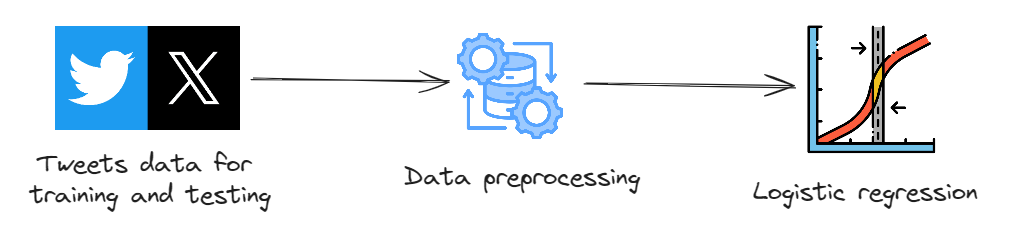

**About the Dataset:**

1. id: unique id for a tweet
2. entity: the entity (person, organization, etc.) that the sentiment is directed towards
3. sentiment: the sentiment of the tweet towards the entity; can be Positive, Negative, or Neutral (irrelevant messages are regarded as Neutral)
4. message: the text of the tweet
5. In this example, we are focusing only on whether the tweet is either negative or positive -> binary classification :
           1: positive tweet
           0: negative tweet

In [1]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# For data visualization
import matplotlib.pyplot as plt

**import stopwords** : Importing the list of common stopwords like ['i', 'me', 'my', 'myself' .....] to remove them from the text data, which helps in improving model performance by eliminating **insignificant words**.

In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
# printing the stopwords in English
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '


**import PorterStemmer** : for stemming words in the text data, which reduces words to their root form and helps in normalizing the text data.exemple :

* trouble -> troubl
* troubling -> troubl
* troubled -> troubl

**import TfidfVectorizer** : to convert the text data into numerical feature vectors based on Term Frequency-Inverse Document Frequency (TF-IDF), which is used for training the machine learning model.

*We will not use the train_test_split module because the data has already been split into train and test datasets.*

In [11]:
# loading the dataset to a pandas DataFrame
train_data = pd.read_csv('/content/twitter_training.csv')
validation_data = pd.read_csv('/content/twitter_validation.csv')

In [12]:
print(train_data.columns)
print(validation_data.columns)

Index(['id', 'entity', 'sentiment', 'message'], dtype='object')
Index(['id', 'entity', 'sentiment', 'message'], dtype='object')


Now we will process the data to prepare suitable training data:
- Keep only two columns: 'sentiment' and 'message'.
- For the 'sentiment' column, select only the values 'Positive' or 'Negative', then convert them to 1 or 0 because machines do not understand textual data.

In [13]:
# Keep only the 'sentiment' and the message column
train_data = train_data[['sentiment', 'message']]
validation_data = validation_data[['sentiment', 'message']]

# Filter rows to keep only 'Positive' or 'Negative' sentiments
train_data = train_data[train_data['sentiment'].isin(['Positive', 'Negative'])]
validation_data = validation_data[validation_data['sentiment'].isin(['Positive', 'Negative'])]

# Convert 'Positive' to 1 and 'Negative' to 0
train_data['sentiment'] = train_data['sentiment'].map({'Positive': 1, 'Negative': 0})
validation_data['sentiment'] = validation_data['sentiment'].map({'Positive': 1, 'Negative': 0})

In [14]:
# Dataset example after processing
print(train_data.head())

   sentiment                                            message
0          1  im getting on borderlands and i will murder yo...
1          1  I am coming to the borders and I will kill you...
2          1  im getting on borderlands and i will kill you ...
3          1  im coming on borderlands and i will murder you...
4          1  im getting on borderlands 2 and i will murder ...


In [15]:
# replacing the null values with empty string
train_data = train_data.fillna('')
validation_data = validation_data.fillna('')

In [16]:
port_stem = PorterStemmer()

In [17]:
def stemming(content):
    # Replace non-alphabetical characters with spaces
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)

    # Convert the content to lowercase
    stemmed_content = stemmed_content.lower()

    # Split the content into individual words
    stemmed_content = stemmed_content.split()

    # Apply stemming to each word, excluding stopwords
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [19]:
train_data['message'] = train_data['message'].apply(stemming)
validation_data['message'] = validation_data['message'].apply(stemming)

In [20]:
# converting the textual data to numerical data
vectorizer = TfidfVectorizer()

# Fit is use to to learn the vocabulary to also compute the IDF (Inverse Document Frequency)
vectorizer.fit(train_data['message'])

# Transform both training and validation data
X_train = vectorizer.transform(train_data['message'])
Y_train = train_data['sentiment'].values

X_validation = vectorizer.transform(validation_data['message'])
Y_validation = validation_data['sentiment'].values

In [21]:
print(X_train)
print(Y_train)

  (0, 7751)	0.6814513546837069
  (0, 5691)	0.5032742327386273
  (0, 4618)	0.3187552616707551
  (0, 1312)	0.4251284288521473
  (1, 6388)	0.5023386124604367
  (1, 2142)	0.44735657082948016
  (1, 1311)	0.7399513612170814
  (2, 6388)	0.551367086470681
  (2, 5691)	0.5736903082305943
  (2, 4618)	0.3633541962260367
  (2, 1312)	0.48461066257775354
  (3, 7751)	0.6545338470299332
  (3, 5691)	0.4833947682418888
  (3, 2142)	0.41373525493499647
  (3, 1312)	0.40833574415233354
  (4, 7751)	0.6814513546837069
  (4, 5691)	0.5032742327386273
  (4, 4618)	0.3187552616707551
  (4, 1312)	0.4251284288521473
  (5, 7751)	0.6814513546837069
  (5, 5691)	0.5032742327386273
  (5, 4618)	0.3187552616707551
  (5, 1312)	0.4251284288521473
  (6, 13042)	0.2806963063383216
  (6, 12909)	0.2500675551213912
  :	:
  (43371, 3202)	0.31737970739017274
  (43371, 990)	0.32282798446915084
  (43372, 13473)	0.18162657408315588
  (43372, 13150)	0.27440305661961983
  (43372, 9594)	0.2971799475768129
  (43372, 8629)	0.4059757580712573

Training the Model: Logistic Regression

In [22]:
model = LogisticRegression()

In [23]:
model.fit(X_train, Y_train)

LogisticRegression()

In [31]:
# Accuracy score on the training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [32]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.9054733250334301


In [33]:
# Accuracy score on the test data
X_validation_prediction = model.predict(X_validation)
training_data_accuracy = accuracy_score(X_validation_prediction, Y_validation)

In [34]:
print('Accuracy score of the test data : ', training_data_accuracy)

Accuracy score of the test data :  0.9447513812154696


Making a Predictive System

In [50]:
X_new = X_train[10]

prediction = model.predict(X_new)
print(prediction)

if (prediction[0]==0):
  print('The tweet is negative')
else:
  print('The tweet is positive')

[1]
The tweet is positive


In [51]:
print(Y_train[10])

1


In [52]:
X_new_valid = X_validation[10]

prediction = model.predict(X_new_valid)
print(prediction)

if (prediction[0]==0):
  print('The tweet is negative')
else:
  print('The tweet is positive')

[0]
The tweet is negative


In [53]:
print(Y_validation[10])

0
